# Car Mileage Prediction using Linear Regression📏
# This project predicts car mileage (mpg) based on engine size, weight, and horsepower using linear regression

### importing modules
#### we import the nedded python modules to clean the data visuvalize the data and to use the ml model

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###loading the data set using pandas🔃

In [26]:
data=pd.read_csv('/content/auto-mpg.csv')

####analyzing the dataset:👀

In [27]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


###it describe the data like min max count only works on numerical rows

In [29]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


is null used to find the null values and .sum is used to sum those over here


In [30]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


can't convert any numeric values in string when it contains any specialcharacters so it gives an error

In [32]:
data['horsepower'].isnull().sum()

np.int64(0)

##converting horsepower column into numeric type

In [33]:
data['horsepower']=pd.to_numeric(data['horsepower'],errors='coerce')

after converting to numeric we can find that we have 6 null values


In [34]:
data['horsepower'].isnull().sum()

np.int64(6)

now replacing the null values with medaiin of horespower column and we use inplace true over here to modify in existing rows rather than creating a new one


In [35]:
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

/tmp/ipython-input-4210805579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(),inplace=True)


In [36]:
data['horsepower']

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


over here we have two many unneccsary columns so we have to drop those these dont affetct the mileage of the car so even if we drop them dont effect the out

In [37]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


so here we are dropping the colummns which are not needded

In [38]:
data.drop(['car name','origin','cylinders','acceleration','model year'],axis=1,inplace=True)

after dropping the columns we can see the new dataframe which are required for our machine learning model

In [39]:
data

,mpg,displacement,horsepower,weight
0,18.0,307.0,130.0,3504
1,15.0,350.0,165.0,3693
2,18.0,318.0,150.0,3436
3,16.0,304.0,150.0,3433
4,17.0,302.0,140.0,3449
...,...,...,...,...
393,27.0,140.0,86.0,2790
394,44.0,97.0,52.0,2130
395,32.0,135.0,84.0,2295
396,28.0,120.0,79.0,2625


#Training the Model
###we train the model using engine size,weight,horsepower and we wanna get the mileage as output

In [90]:
x=data.drop(['mpg'],axis=1)
y=data['mpg']

we are splitting the data into two parts 80% training and 20% testing

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

asigning the data to our model

In [92]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##now checking the predictions

In [93]:
predictions=model.predict(x_test)

In [94]:
print(predictions)

[26.11402919 23.43879445  9.91915765 14.98436462 10.63190453 28.97154966
 19.2478781  16.28054232 10.77079737 26.03346851  6.18826858 29.9811999
 23.61586845 17.70467976 29.59757341 30.99803777 23.75115868 29.32017679
 23.3791922  11.10147575 19.2205093  27.65659073 28.99045774 31.60676317
 25.87434459 26.22286775 31.58044674 31.01446685 28.18971231 16.56824403
 18.71756023  9.91416877 21.6077712   8.76774536 19.98687309 23.7527718
 19.74527299 15.23245802 27.83747835 27.77861305 14.57175977 20.43849158
 24.07234612 26.86303658 13.29462979 30.91510223 19.49010539 22.87352068
 21.31555523 12.34263643 20.02628921 13.97566011 31.88201858 22.00724104
 15.34149144 14.10492594 19.85891253 24.35915068 26.5201953  25.72641793
 16.81719461 22.60189814 20.89707116 25.49304256 24.82751613 26.20534734
 30.98445138 32.21547446 12.54756875 15.34692888 30.75452447 30.32161192
 26.63231599 27.23944244 20.12930095 27.36793201 32.56594514 23.65799308
 32.39959347 27.68745061]


In [95]:
y_test

,mpg
397,31.0
361,25.4
43,13.0
213,13.0
105,13.0
...,...
319,31.3
343,39.1
259,20.8
117,29.0


In [96]:
mse=mean_squared_error(predictions,y_test)
print(mse)

17.388799122089473


In [97]:
r2=r2_score(predictions,y_test)
print(r2)

0.6182809127283717


In [100]:
mae = mean_absolute_error(y_test, predictions)

In [101]:
print(mae)

3.202197392797403


## Visualization: Weight vs Mileage,Weigt vs Displacement,Weight vs Horsepower


##scatter plot between Displacement and mileage

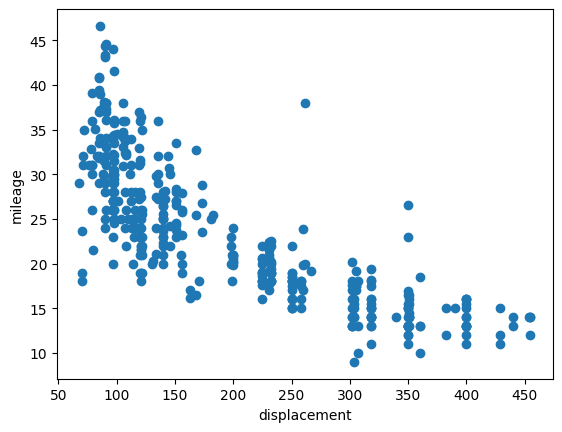

In [111]:
x=data['displacement']
y=data['mpg']
plt.xlabel('displacement')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

##scatter plot between weight and mileage


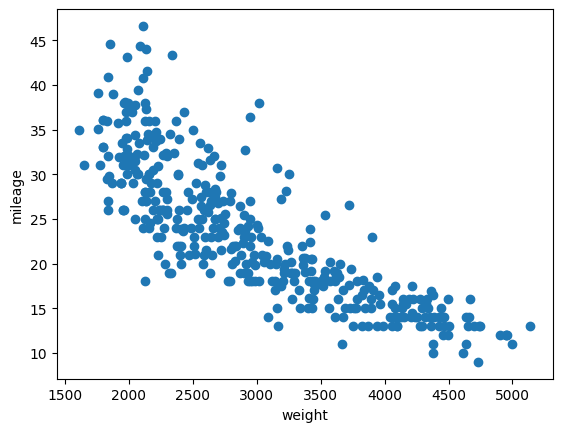

In [112]:
x=data['weight']
y=data['mpg']
plt.xlabel('weight')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

##scatter plot between horsepower and mileage

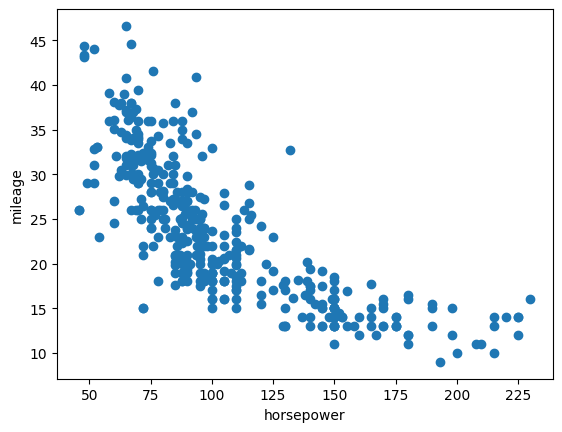

In [113]:
x=data['horsepower']
y=data['mpg']
plt.xlabel('horsepower')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

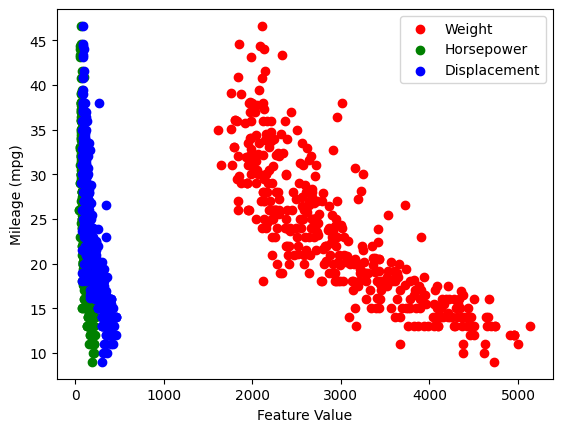

In [109]:
plt.scatter(data['weight'], data['mpg'], color='red', label='Weight')
plt.scatter(data['horsepower'], data['mpg'], color='green', label='Horsepower')
plt.scatter(data['displacement'], data['mpg'], color='blue', label='Displacement')

plt.xlabel('Feature Value')
plt.ylabel('Mileage (mpg)')
plt.legend()
plt.show()